# Red_wine_Quality-Decision Tree & Random Forest

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).



1)Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

2)Read file

In [ ]:
df=pd.read_csv("/content/winequality-red.csv")

3)EDA

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data=df

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.shape  #dataset have 12 feature and attributes 1599

(1599, 12)

In [ ]:
df.dtypes
# all are numerical and float data types 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

4)To check missing data

In [ ]:
df.isnull().sum()  #No missing values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.corr().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


5) Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc689ba7490>,
      dtype=object)

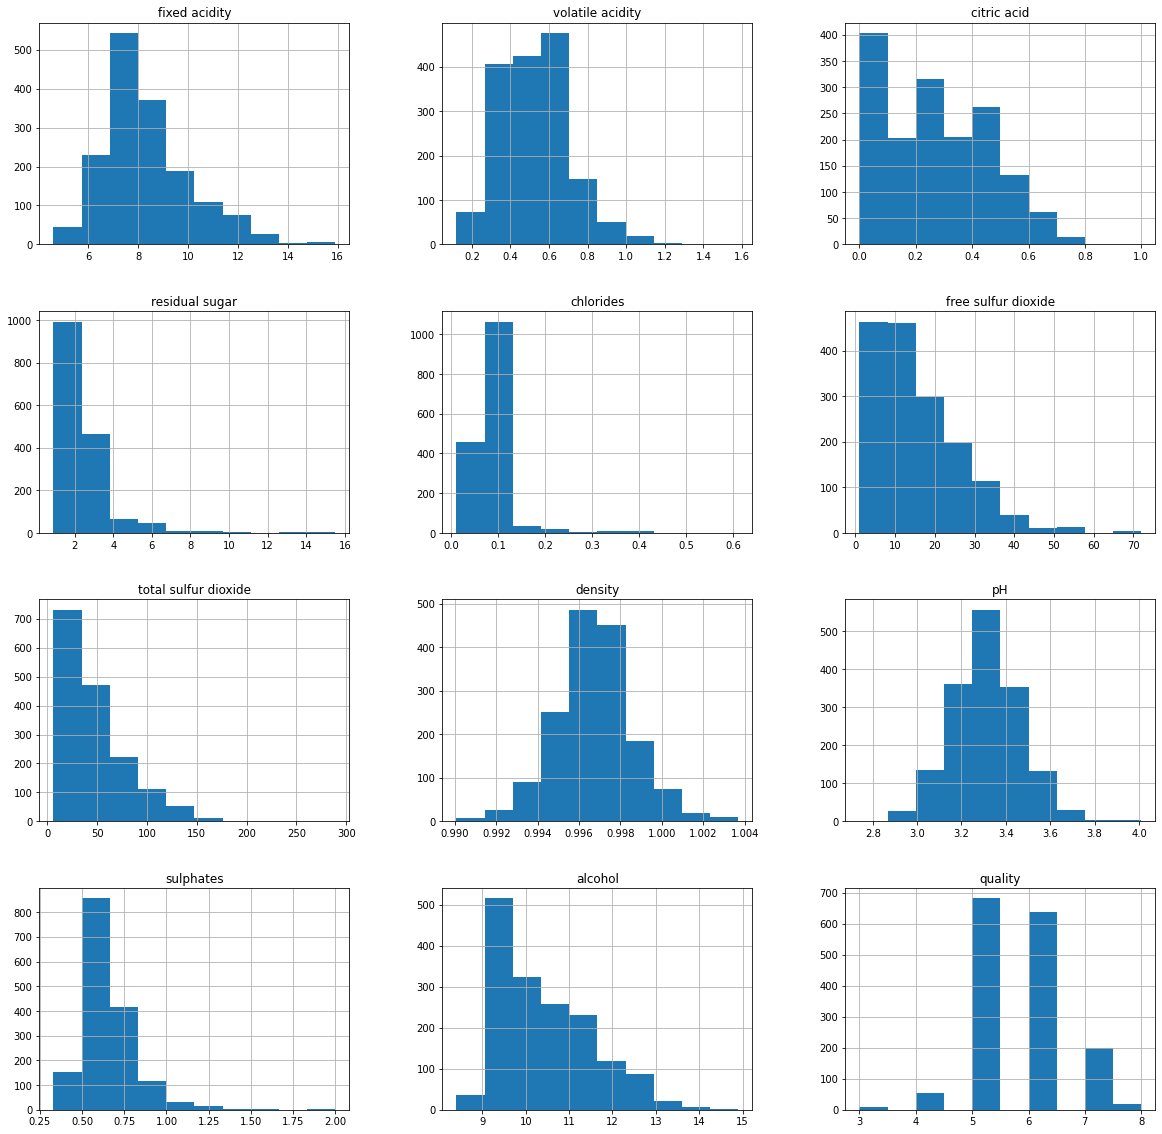

In [ ]:
df.hist(figsize = (20,20))

insights:
ph and density is normallly distributed data
fixed acidity and alcohol is rightly skewed

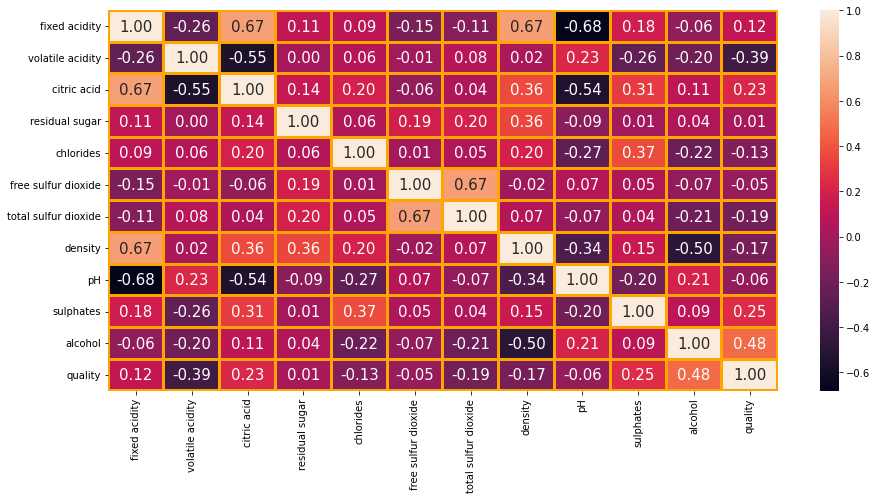

In [ ]:
plt.figure(figsize = (15, 7))
sn.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

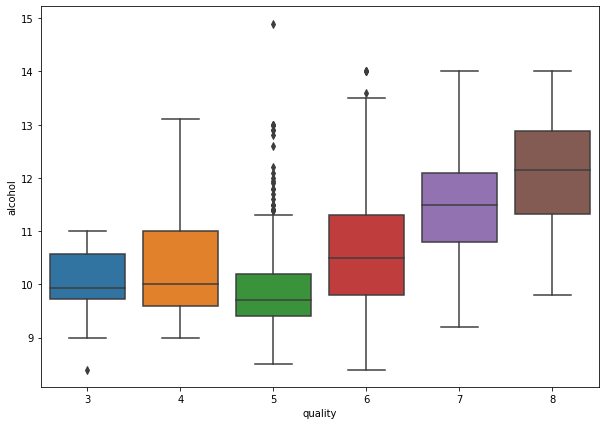

In [ ]:
plt.figure(figsize=(10,7))
sn.boxplot(x='quality',y='alcohol',data=df)

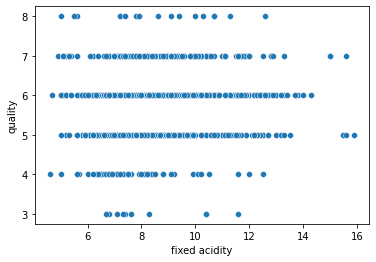

In [ ]:
sn.scatterplot(x = 'fixed acidity', y = 'quality', data = df)
plt.show()
#fixed acidity is between 2 to 12 for the better quality of wine


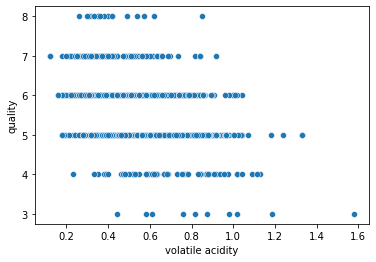

In [ ]:
sn.scatterplot(x = 'volatile acidity', y = 'quality', data = df)
plt.show()
# volatile acidity should be between 0.2 to 1.0 for the better quality of wine

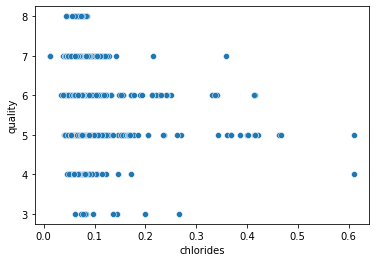

In [ ]:
sn.scatterplot(x = 'chlorides', y = 'quality', data = df)
plt.show()


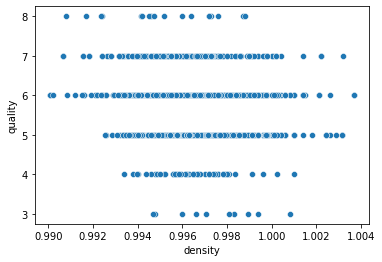

In [ ]:
sn.scatterplot(x = 'density', y = 'quality', data = df)
plt.show()

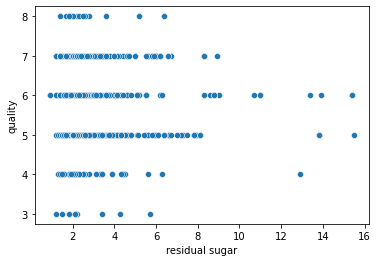

In [ ]:
sn.scatterplot(x = 'residual sugar', y = 'quality', data = df)
plt.show()

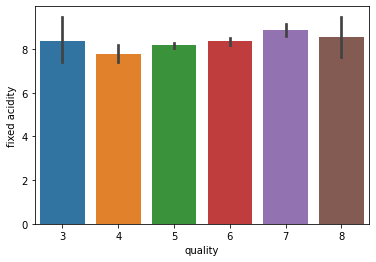

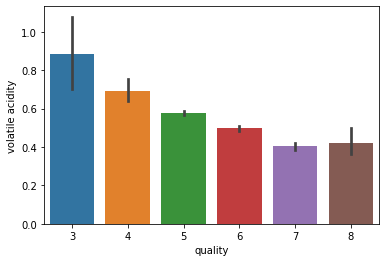

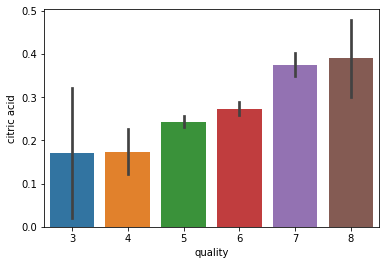

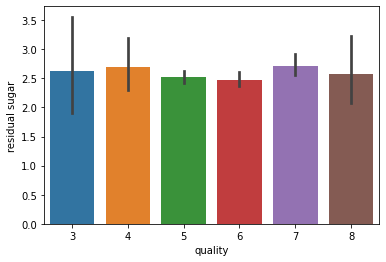

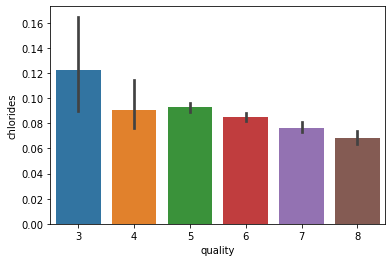

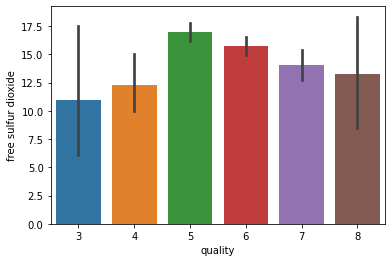

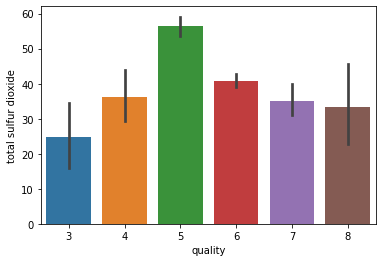

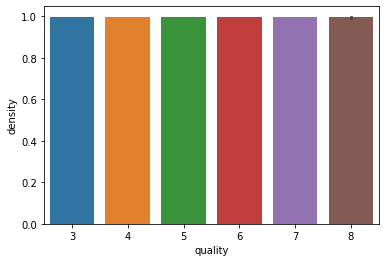

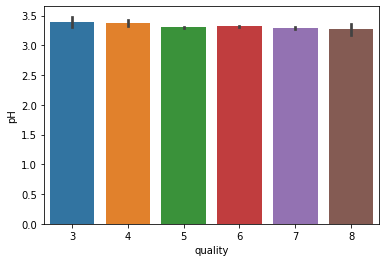

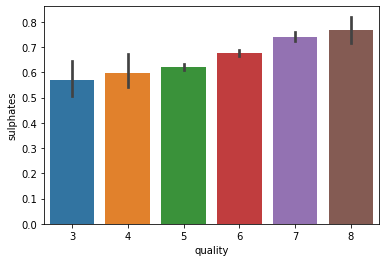

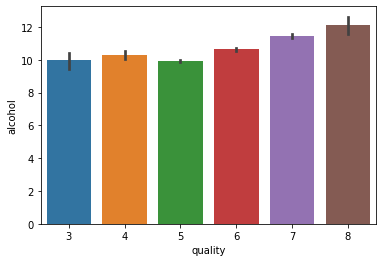

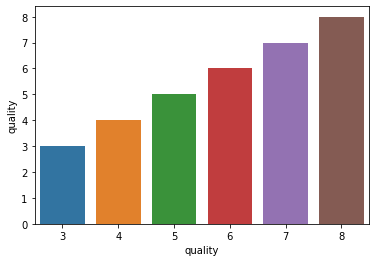

In [ ]:
#charts that relate all the variables to the quality of the wine
for i in df.columns:
    plt.figure(i)
    sn.barplot(x = "quality", y = i, data = df)

Looks like the variables (ph,density,residual sugar and fixed acidity) don´t have a strong relationshiop with the quality of the wine.

#Deciding dependent and independant variables

In [ ]:
X = df.drop(['quality'], axis=1)

y = df['quality']

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#Training a Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#Predictions and Evaluation of Decision Tree

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.33      0.50      0.40         2
           4       0.12      0.14      0.13        14
           5       0.71      0.68      0.70       226
           6       0.60      0.65      0.62       203
           7       0.48      0.43      0.46        76
           8       0.00      0.00      0.00         7

    accuracy                           0.61       528
   macro avg       0.37      0.40      0.38       528
weighted avg       0.61      0.61      0.61       528



Show the Confusion Matrix for the predictions.

In [ ]:
print(confusion_matrix(y_test,predictions))

[[  1   0   1   0   0   0]
 [  0   2   6   5   1   0]
 [  2  10 154  49  11   0]
 [  0   4  42 131  23   3]
 [  0   0  12  29  33   2]
 [  0   0   1   5   1   0]]


#Training the Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

#Predictions and Evaluation


In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.76      0.79      0.77       226
           6       0.61      0.73      0.67       203
           7       0.63      0.38      0.48        76
           8       0.00      0.00      0.00         7

    accuracy                           0.67       528
   macro avg       0.33      0.32      0.32       528
weighted avg       0.65      0.67      0.66       528



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Show the Confusion Matrix for the predictions.

In [ ]:
print(confusion_matrix(y_test,predictions))

[[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  2   1 178  43   2   0]
 [  0   0  42 149  12   0]
 [  0   0   4  43  29   0]
 [  0   0   0   4   3   0]]


[Text(0.5, 0.875, 'X[10] <= 10.525\ngini = 0.64\nsamples = 1071\nvalue = [8, 39, 455, 435, 123, 11]'),
 Text(0.25, 0.625, 'X[9] <= 0.555\ngini = 0.545\nsamples = 674\nvalue = [6, 26, 392, 228, 21, 1]'),
 Text(0.125, 0.375, 'X[10] <= 10.15\ngini = 0.412\nsamples = 220\nvalue = [2, 14, 163, 41, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.376\nsamples = 197\nvalue = [1, 13, 152, 31, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.578\nsamples = 23\nvalue = [1, 1, 11, 10, 0, 0]'),
 Text(0.375, 0.375, 'X[6] <= 28.5\ngini = 0.573\nsamples = 454\nvalue = [4, 12, 229, 187, 21, 1]'),
 Text(0.3125, 0.125, 'gini = 0.583\nsamples = 144\nvalue = [2, 5, 46, 80, 10, 1]'),
 Text(0.4375, 0.125, 'gini = 0.531\nsamples = 310\nvalue = [2, 7, 183, 107, 11, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.445\ngini = 0.635\nsamples = 397\nvalue = [2, 13, 63, 207, 102, 10]'),
 Text(0.625, 0.375, 'X[9] <= 0.735\ngini = 0.61\nsamples = 203\nvalue = [0, 2, 18, 98, 78, 7]'),
 Text(0.5625, 0.125, 'gini = 0.564\nsamples = 111\nvalue = [0,

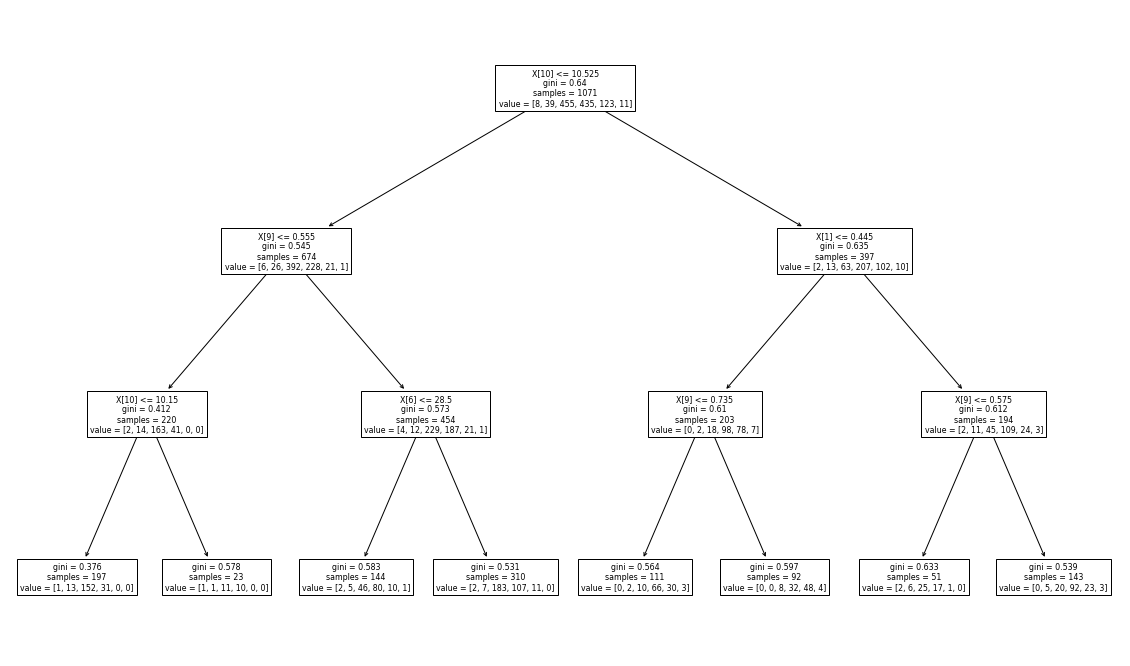

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(20,12))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 